## Netflix content strategy analysis 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn  as sns
import calendar


import warnings
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_csv("netflix_content_2023.csv")
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [29]:
data['Hours Viewed'] = data['Hours Viewed'].str.replace(',', '').astype(float)

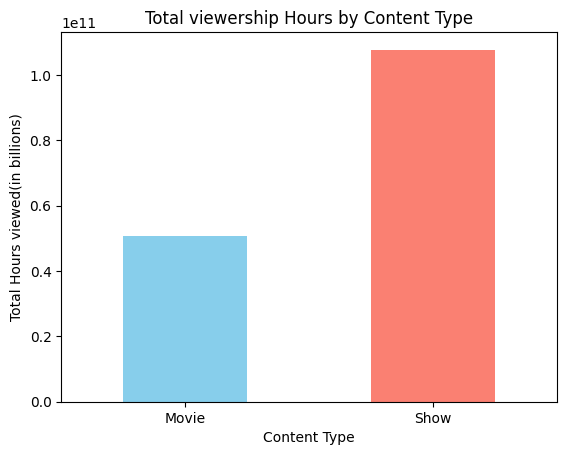

In [ ]:
#most viewed between movie and show
most_viewed_content = data.groupby('Content Type')[ 'Hours Viewed'].sum()\
    .plot(kind='bar', color=['skyblue','salmon'])
plt.xticks(rotation=0)
plt.title('Total viewership Hours by Content Type')
plt.ylabel('Total Hours viewed(in billions)')
plt.show()

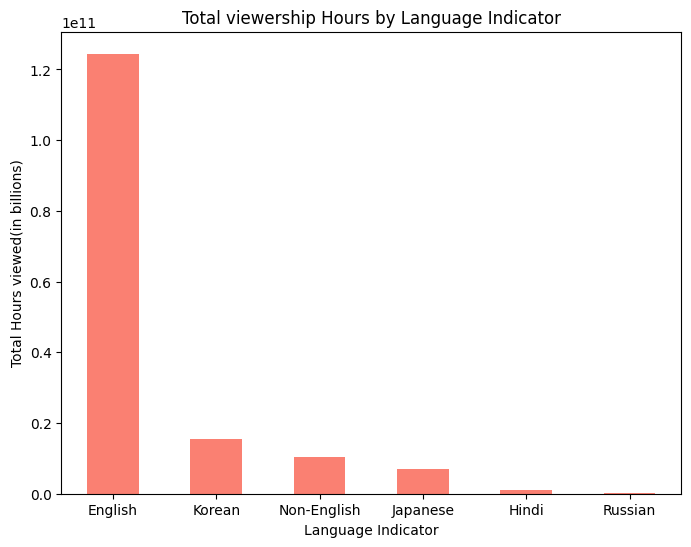

In [31]:
#mosted viewed by language
most_viewed_bylanguage = data.groupby('Language Indicator')['Hours Viewed'].sum()\
    .sort_values(ascending=False)\
    .plot(kind='bar', color='salmon', figsize=(8,6))
plt.xticks(rotation=0)
plt.title('Total viewership Hours by Language Indicator')
plt.ylabel('Total Hours viewed(in billions)')
plt.show()

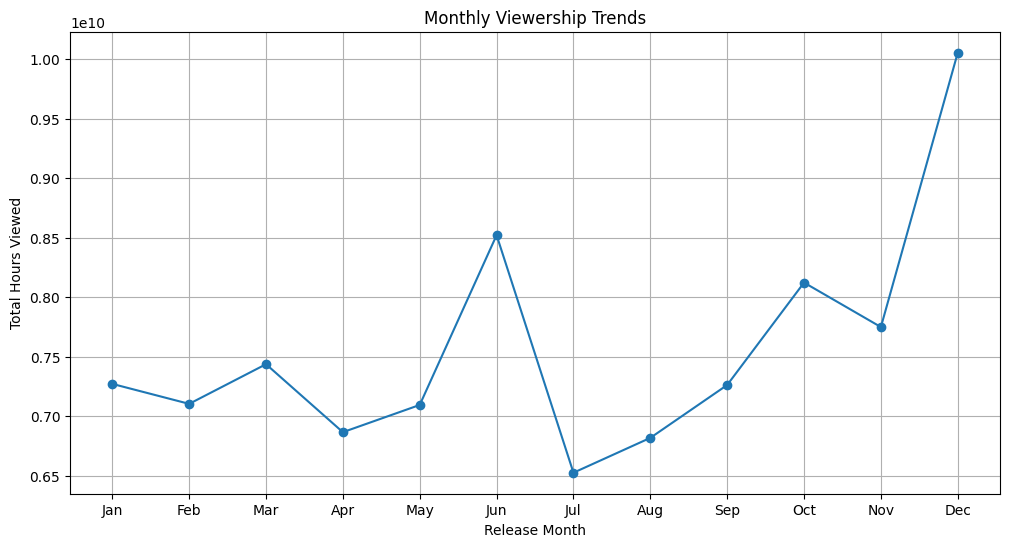

In [32]:
#Viewership base on released date
data['Release Date'] = pd.to_datetime(data['Release Date'])
data['Release Month'] = data['Release Date'].dt.month

monthly_viewership = data.groupby('Release Month')['Hours Viewed'].sum().sort_index()
monthly_viewership.plot(kind='line', marker='o', title='Monthly Viewership Trends', figsize=(12,6))
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.xlabel('Release Month')
plt.ylabel('Total Hours Viewed')
plt.grid(True)
plt.show()

In [33]:
#top 5 base on viewership hours
top_5_titles = data.nlargest(5,'Hours Viewed')
top_5_titles

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,6.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,8.0


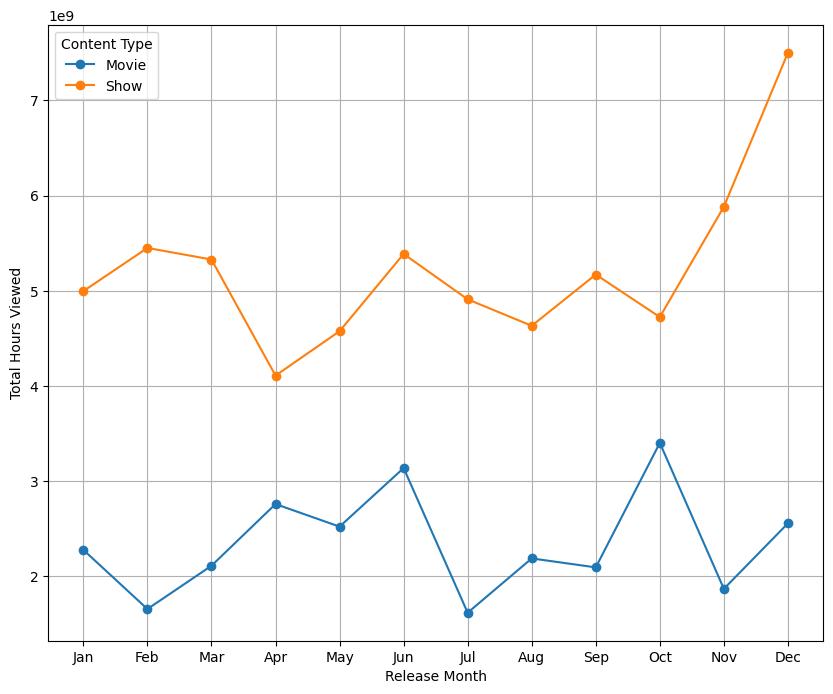

In [34]:
#viewership by content type and release date
monthly_viewership_by_type = data.pivot_table(index='Release Month',
                                              columns='Content Type',
                                              values= 'Hours Viewed',
                                              aggfunc=sum)
monthly_viewership_by_type.plot(kind='line',marker = 'o', figsize=(10,8))
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.ylabel('Total Hours Viewed')
plt.grid(True)
plt.show()

In [35]:
#Seasons based on release month
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
data['Release Season'] = data['Release Month'].apply(season)
data['Release Season'].value_counts()

Release Season
Fall      18921
Summer     1975
Spring     1961
Winter     1955
Name: count, dtype: int64

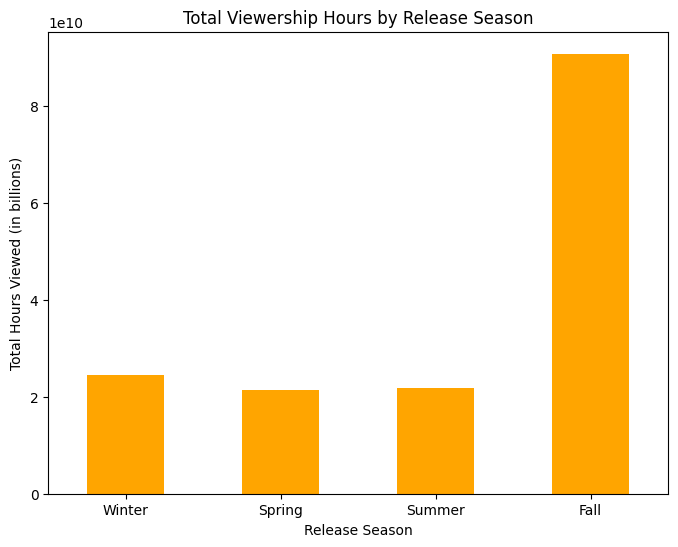

In [ ]:
# Define the desired order for the seasons
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

data['Release Season'] = pd.Categorical(data['Release Season'], categories=season_order, ordered=True)

seasonal_viewership = data.groupby('Release Season')['Hours Viewed'].sum().reindex(season_order)
seasonal_viewership.plot(kind='bar', color='orange', figsize=(8, 6))
plt.xticks(rotation=0)
plt.title('Total Viewership Hours by Release Season')
plt.ylabel('Total Hours Viewed (in billions)')
plt.xlabel('Release Season')
plt.show()

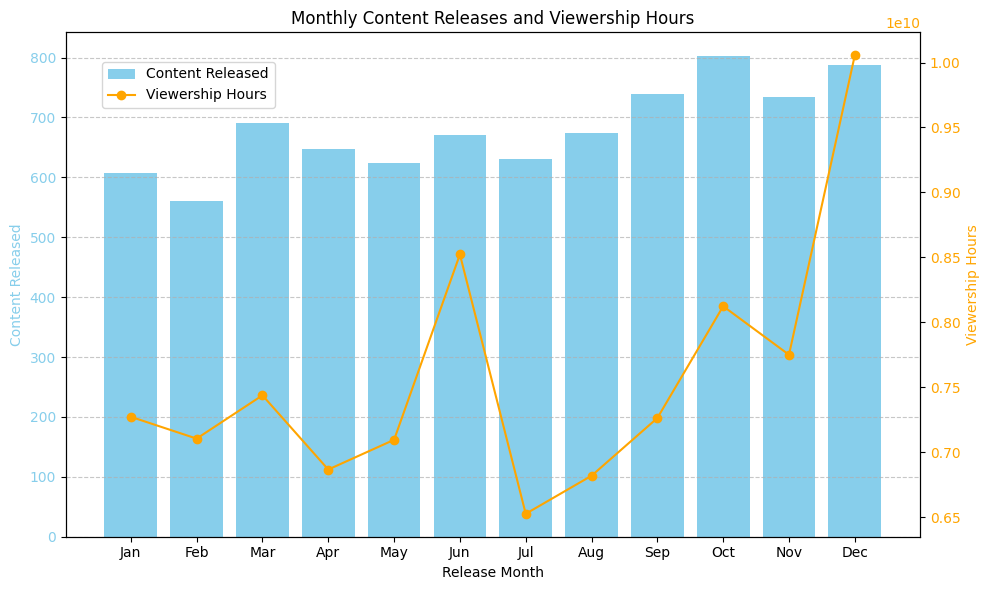

In [37]:
#content released and their viewership hours across the month
data = data.dropna(subset=['Release Month'])
data['Release Month'] = data['Release Month'].astype(int)

all_months = np.arange(1, 13)
monthly_release = data['Release Month'].value_counts().reindex(all_months, fill_value=0)
month_viewership = data.groupby('Release Month')['Hours Viewed'].sum().reindex(all_months, fill_value=0)

fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(monthly_release.index, monthly_release, color='skyblue', label='Content Released')
ax1.set_xlabel('Release Month')
ax1.set_ylabel('Content Released', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(ticks=all_months, labels=[calendar.month_abbr[i] for i in all_months])

ax2 = ax1.twinx()
ax2.plot(month_viewership.index, month_viewership, color='orange', marker='o', label='Viewership Hours')
ax2.set_ylabel('Viewership Hours', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Monthly Content Releases and Viewership Hours')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


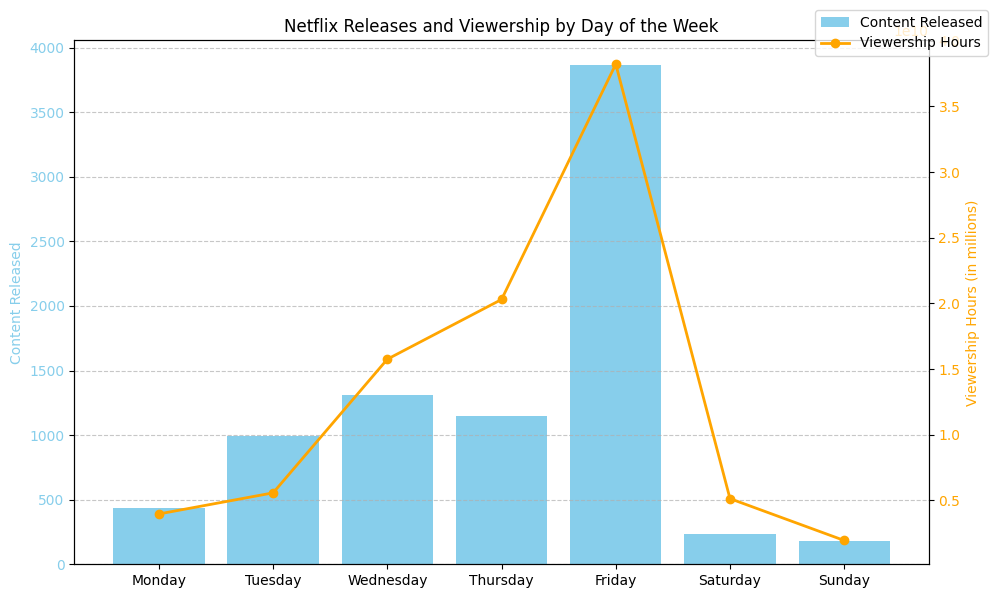

In [38]:
#content released on a specific days, which day with the highest content

data['Release Day'] = data['Release Date'].dt.day_name()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_releases = data['Release Day'].value_counts().reindex(days_order)
weekday_viewership = data.groupby('Release Day')['Hours Viewed'].sum().reindex(days_order)

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(days_order, weekday_releases, color='skyblue', label='Content Released')
ax1.set_ylabel('Content Released', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(days_order, weekday_viewership, color='orange', marker='o', label='Viewership Hours', linewidth=2)
ax2.set_ylabel('Viewership Hours (in millions)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Netflix Releases and Viewership by Day of the Week')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
# define significant holidays and events in 2023

#important dates and their corresponding holidays
important_dates = {
    'New Year\'s Day': '2023-01-01',
    'Valentine\'s Day': '2023-02-14',
    'Independence Day': '2023-07-04',
    'Halloween': '2023-10-31',
    'Christmas Day': '2023-12-25'
}

important_dates = {holiday: pd.to_datetime(date) for holiday, date in important_dates.items()}


def find_nearest_holiday(release_date):
    for holiday, holiday_date in important_dates.items():
        if (holiday_date - release_date).days in range(-3, 4):
            return holiday
    return None

data['Near Holiday'] = data['Release Date'].apply(find_nearest_holiday)

holiday_releases = data[data['Near Holiday'].notna()]

holiday_viewership = holiday_releases.groupby('Near Holiday')['Hours Viewed'].sum()

holiday_releases_summary = holiday_releases[['Title', 'Release Date', 'Hours Viewed', 'Near Holiday']]
holiday_releases_summary


,Title,Release Date,Hours Viewed,Near Holiday
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0,New Year's Day
6,La Reina del Sur: Season 3,2022-12-30,429600000.0,New Year's Day
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0,New Year's Day
29,Perfect Match: Season 1,2023-02-14,176800000.0,Valentine's Day
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0,New Year's Day
...,...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0,Valentine's Day
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0,Valentine's Day
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0,New Year's Day
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0,Valentine's Day
